<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/PencilSketch_OpenCVAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.To obtain a sketch (black-and-white pencil sketch) of the image, we will use an edge-detection filter;

2.There are many different edge detection filters, such as Sobel, Scharr, Laplacian filters, or Canny-edge
detector. We will use a Laplacian edge filter since it produces edges that look most similar to hand
sketches compared to Sobel or Scharr, and that are quite consistent compared to a Canny-edge detector,
which produces very clean line drawings but is affected more by random noise in the camera frames
and the line drawings therefore often change drastically between frames.

3.Nevertheless, we still need to reduce the noise in the image before we use a Laplacian edge filter. We will use a Gaussian Filter to remove the noise. Since Laplacian filters use grayscale images, we must convert from OpenCV's
default BGR format to Grayscale.

In [2]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
trumpPath=root_path+"/trump.jpg"

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

Mounted at /content/gdrive


In [4]:
img = cv2.imread(trumpPath,1)
if (img.any() == None):
  print("Empty Image")

In [5]:
#Convert to grayscale
grayImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

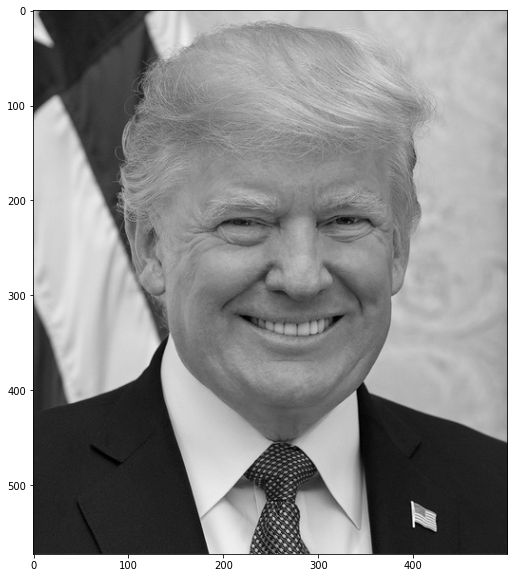

In [7]:
plt.imshow(grayImg,cmap='gray')

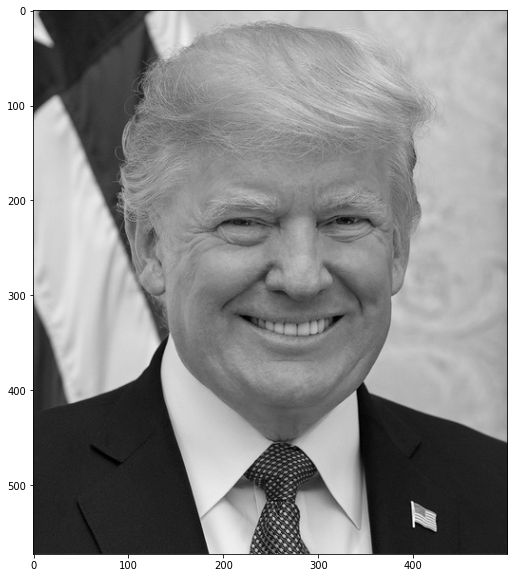

In [9]:
plt.imshow(grayImg,cmap='gray')

In [29]:
# Defining the kernel size
kernelSize = 7

# Performing Median Blurring and store it in numpy array "medianBlurred"
#medianBlurred = cv2.medianBlur(grayImg,kernelSize)
medianBlurred=cv2.GaussianBlur(grayImg,(5,5),0,0)

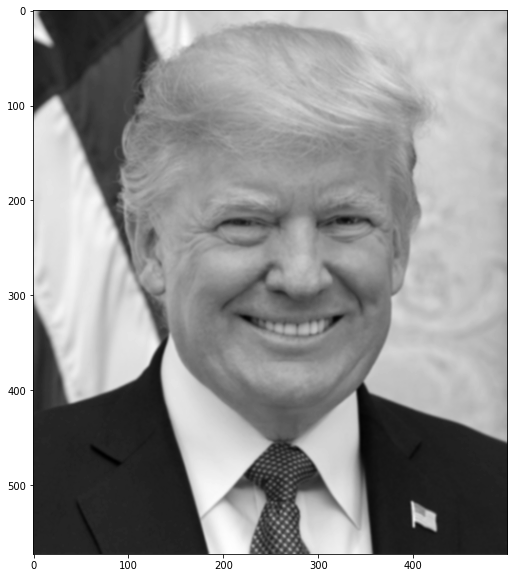

In [30]:
plt.imshow(medianBlurred,cmap='gray')

Text(0.5, 1.0, 'Trump Pencil Sketch')

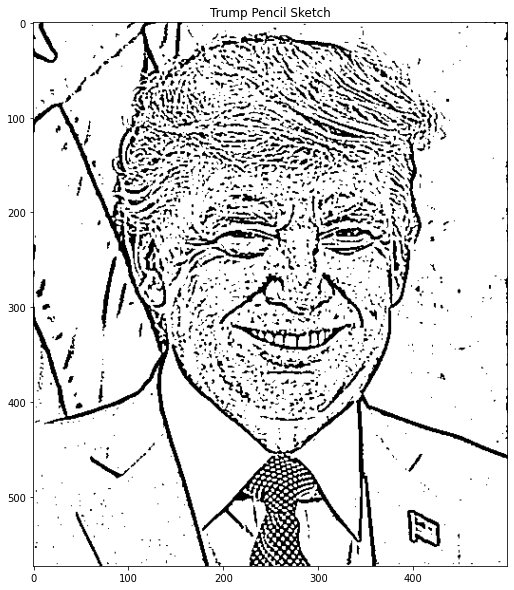

In [31]:
kernelSize = 5
laplacian = cv2.Laplacian(medianBlurred, -1, ksize = kernelSize, 
                            scale = 1, delta = 0)
#invert the binary image
output = 255 - laplacian

#binary thresholding
ret, output = cv2.threshold(output, 180, 255, cv2.THRESH_BINARY)
# Normalize results
#v2.normalize(laplacian, 
                #dst = laplacian, 
                #alpha = 0, 
                #beta = 1, 
                #norm_type = cv2.NORM_MINMAX, 
                #dtype = cv2.CV_32F)
plt.figure(figsize=[20,10])
plt.imshow(output,cmap='gray');plt.title("Trump Pencil Sketch")